f(x) = -12x^4*sin(cos(x)) - 18x^3+5x^2 + 10x - 30
Определить корни
Найти интервалы, на которых функция возрастает
Найти интервалы, на которых функция убывает
Построить график
Вычислить вершину
Определить промежутки, на котором f > 0
Определить промежутки, на котором f < 0

In [1]:
import sympy as sp

In [2]:
x = sp.symbols('x')
f = sp.simplify('-12*x^4*sin(cos(x)) - 18*x^3+5*x^2 + 10*x - 30')
f

-12*x**4*sin(cos(x)) - 18*x**3 + 5*x**2 + 10*x - 30

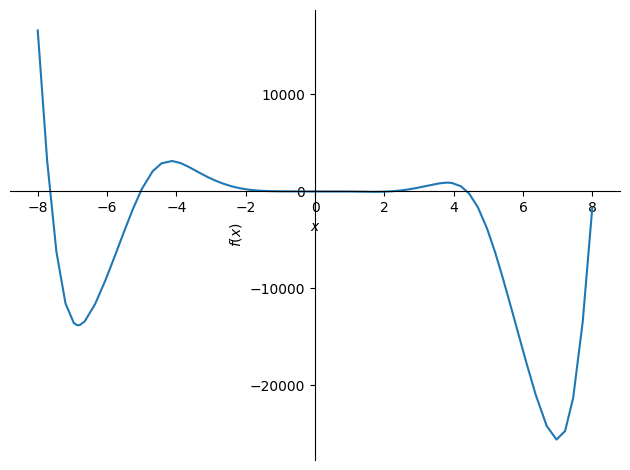

In [7]:
sp.plot(f, (x, -8, 8))

In [8]:
f.evalf(subs={x: 20})
xlist = []
ylist = []
i = -8
while i < 9:
    result = f.evalf(subs={x: i})
    if 0 <= result <= 0.01:
        xlist.append(i)
        ylist.append(result)
    i += 0.0001
print('x', xlist)
print('y', ylist)

x [-1.3389999999989577]
y [0.00368698844475497]
